# Import and warehouse data:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns

In [9]:
df = pd.read_excel('Part2 - Company.xlsx')

In [11]:
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


Check using the head function to fetch the data properly.

In [12]:
df.shape

(61, 5)

The data contains 61 rows and 5 columns

In [13]:
df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

There are 18 null vlaues are observed in the target variable 'Quality'

# Design a synthetic data generation model to impute the target variable

Let us scale the dataset using zscore to make sure that there no unit discrepancy in the dataset.

In [14]:
dfAttr=df.iloc[:,:-1]
dfAttr.shape
dfScaled = dfAttr.apply(zscore)
dfScaled.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


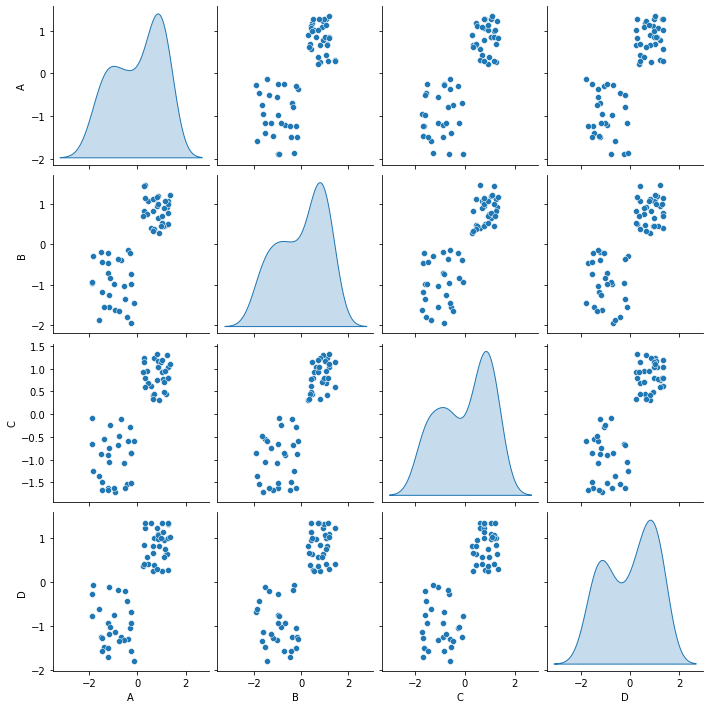

In [15]:
sns.pairplot(dfScaled,diag_kind='kde')

# From the above pair plot it is very evident that there are two guassian present in the dataset. 

# Finding optimal no. of clusters

C:\Users\selvakumarp\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

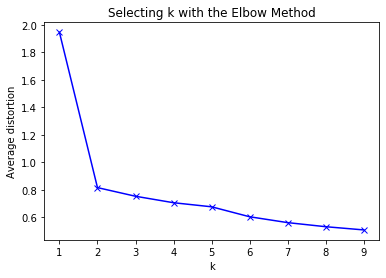

In [16]:

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [20]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,A,B,C,D,Quality,GROUP
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0


In [21]:
dfClust = df.groupby(['GROUP'])
dfClust.mean()

,A,B,C,D
GROUP,,,,
0,58.75000,60.928571,49.750000,53.000000
1,169.30303,163.909091,168.666667,166.606061


In [22]:
dfClust.head(25)

,A,B,C,D,Quality,GROUP
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


# From the KMeans cluster, it is found that
# 'Quality A' is segragated by Group --> 0 
# 'Quality B' is segragated by Group --> 1

In [25]:
df['GROUP'] = df['GROUP'].replace({1: 'Quality A', 0: 'Quality B'})
df['Quality'] = df['GROUP'].fillna(df['GROUP'])
finaldata = df.drop('GROUP', axis=1)

In [26]:
finaldata.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality B
1,174,133,134,166,Quality A
2,159,163,135,131,Quality A
3,61,23,3,44,Quality B
4,59,60,9,68,Quality B


# The dataset is imputed for the target vaiable and saved in the separate excel sheet for the further use.

In [27]:
finaldata.to_excel('Part2datawithimpute.xlsx', index=False)

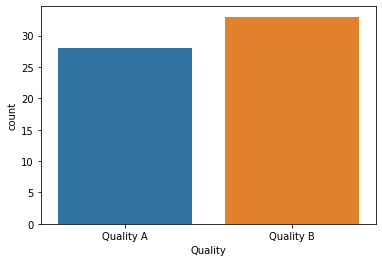

In [26]:
sns.countplot(x='Quality',data = finaldata)